In [9]:
import numpy as np

# initialize variables
n = 1000 # number of nodes
p = 0.5 # constant parameter

# k = math.ceil(p * math.log2(n)) # calculate number of attributes
k = 5
# values inside affinity matrix
alpha = 0.98
beta = 0.58
gamma = 0.05

# affinity matrix for all i
aff = np.array([[alpha,beta],[beta, gamma]])

# Probability of answer being yes/true = 0
mu = 0.45

# Attribute Matrix. k-rows and n columns. 
V = np.random.binomial(1,mu,size=(k,n))
P_u_v = np.empty((len(V.T),len(V.T)))
prob_u_v = np.empty((len(V),1))
u = np.empty((len(V),1))
v = np.empty((len(V),1))

# create probability for connection between u and v
for i in range(len(V.T)):
    u = V[:,i]

    for k in range(len(V.T)):
        v = V[:,k]

        for j in range(len(V)):
            prob_u_v[j] = aff[u[j],v[j]]

        P_u_v[i,k] = np.prod(prob_u_v) 



np.fill_diagonal(P_u_v,0)
np.triu(P_u_v)



array([[0.        , 0.11090166, 0.00139258, ..., 0.00956049, 0.00565825,
        0.01615393],
       [0.        , 0.        , 0.00956049, ..., 0.00139258, 0.00082418,
        0.11090166],
       [0.        , 0.        , 0.        , ..., 0.00082418, 0.00048778,
        0.00956049],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.00048778,
        0.00956049],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00565825],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [10]:
A = np.triu(P_u_v,0)

for i in range(len(P_u_v)):
    for j in range(len(P_u_v)):
        if A[i,j] > np.random.rand():
            A[i,j] = 1
        else:
            A[i,j] = 0



In [11]:
A = A + A.T - np.diag(np.diag(A))
np.sum(A) / 2

35384.0

In [12]:
import networkx as nx
import matplotlib.pyplot as plt 
G = nx.from_numpy_matrix(A)
# pos = nx.kamada_kawai_layout(G)


In [13]:
nx.write_edgelist(G, "test.edgelist.txt")

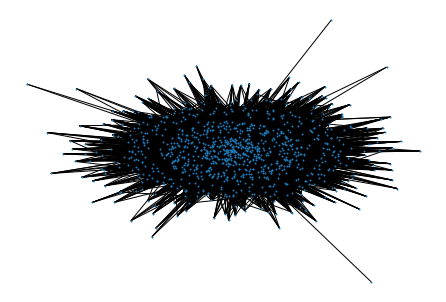

In [14]:
nx.draw(G,node_size=1)
plt.show()